In [1]:
import os
import pandas as pd
import numpy as np
import warnings
import sys
warnings.filterwarnings("ignore")

INSTALL_DEPS = False
if INSTALL_DEPS:
    # If Kaggle or Colab, you have to manage these. If local, install all
    %pip install gym==0.26.2
    %pip install matplotlib==3.8.4
    %pip install numpy==2.1.1
    %pip install pandas==2.2.2
    %pip install pandas_datareader==1.16.0
    %pip install protobuf==5.28.1
    %pip install Requests==2.32.3
    %pip install scipy==1.14.1
    %pip install statsmodels==0.14.2
    %pip install tabulate==0.9.0
    %pip install torch==2.3.0
    %pip install tqdm==4.66.4

IN_KAGGLE = IN_COLAB = False
try:
    # https://www.tensorflow.org/install/pip#windows-wsl2
    import google.colab
    from google.colab import drive

    drive.mount("/content/drive")
    DATA_PATH = "/drive/input/drl-dataset-quant"
    IN_COLAB = True
    print("Colab!")
except:
    IN_COLAB = False
if "KAGGLE_KERNEL_RUN_TYPE" in os.environ and not IN_COLAB:
    print("Running in Kaggle...")
    for dirname, _, filenames in os.walk("/kaggle/input"):
        for filename in filenames:
            print(os.path.join(dirname, filename))
    DATA_PATH = "/kaggle/input/drl-dataset-quant"
    sys.path.insert(1, "/kaggle/usr/lib/drlutil")
    IN_KAGGLE = True
    print("Kaggle!")
elif not IN_COLAB:
    IN_KAGGLE = False
    DATA_PATH = "./data/"
    print("running localhost!")

running localhost!


In [2]:
from drlutil import TradingSimulator

INFO:root:Training progression (hardware selected => cuda:0):
100%|██████████| 1/1 [00:18<00:00, 18.76s/it]
INFO:root:
╒═══════════════════════════╤═══════════╕
│   Performance Indicator   │   TDQN    │
╞═══════════════════════════╪═══════════╡
│    Profit & Loss (P&L)    │  -99204   │
├───────────────────────────┼───────────┤
│     Annualized Return     │ -100.00%  │
├───────────────────────────┼───────────┤
│   Annualized Volatility   │  52.44%   │
├───────────────────────────┼───────────┤
│       Sharpe Ratio        │  -1.263   │
├───────────────────────────┼───────────┤
│       Sortino Ratio       │  -1.485   │
├───────────────────────────┼───────────┤
│     Maximum Drawdown      │  99.33%   │
├───────────────────────────┼───────────┤
│ Maximum Drawdown Duration │ 1413 days │
├───────────────────────────┼───────────┤
│       Profitability       │  46.39%   │
├───────────────────────────┼───────────┤
│ Ratio Average Profit/Loss │   0.389   │
├───────────────────────────┼───────────┤

(<drlutil.TDQN at 0x7f561ab8b970>,
 <drlutil.TradingEnv at 0x7f546ffa7400>)

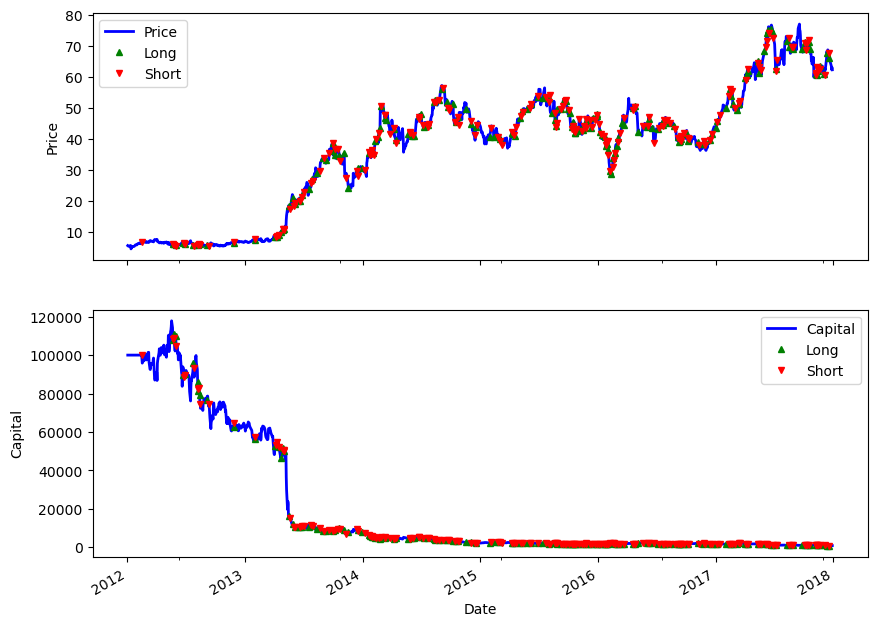

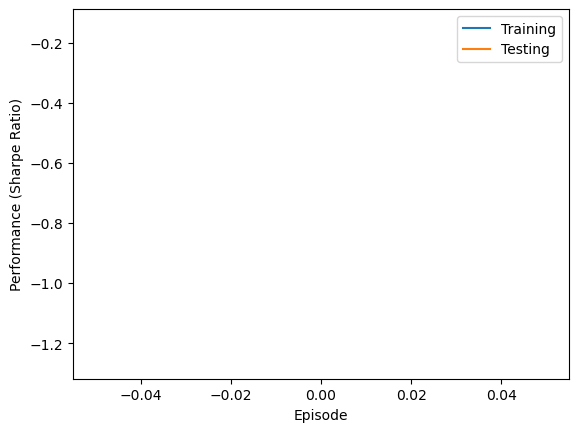

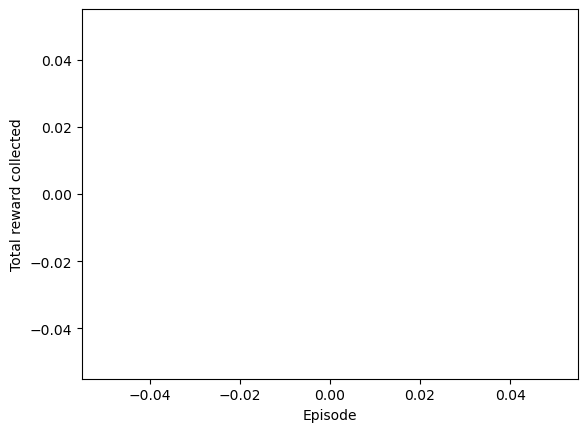

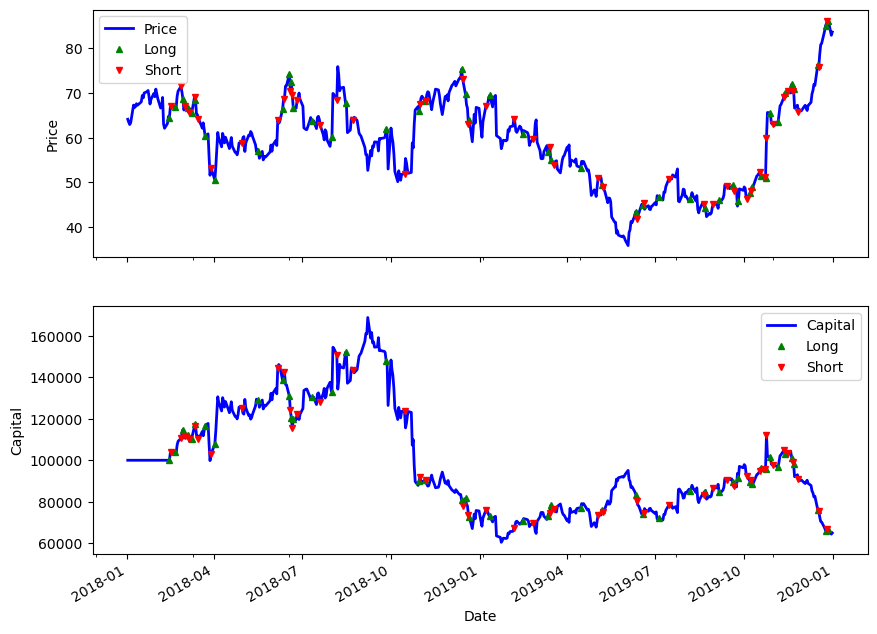

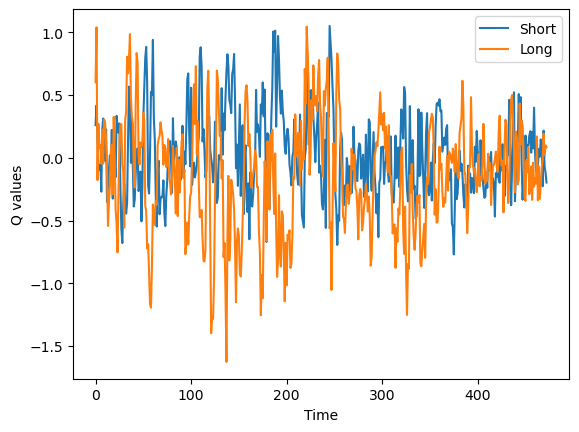

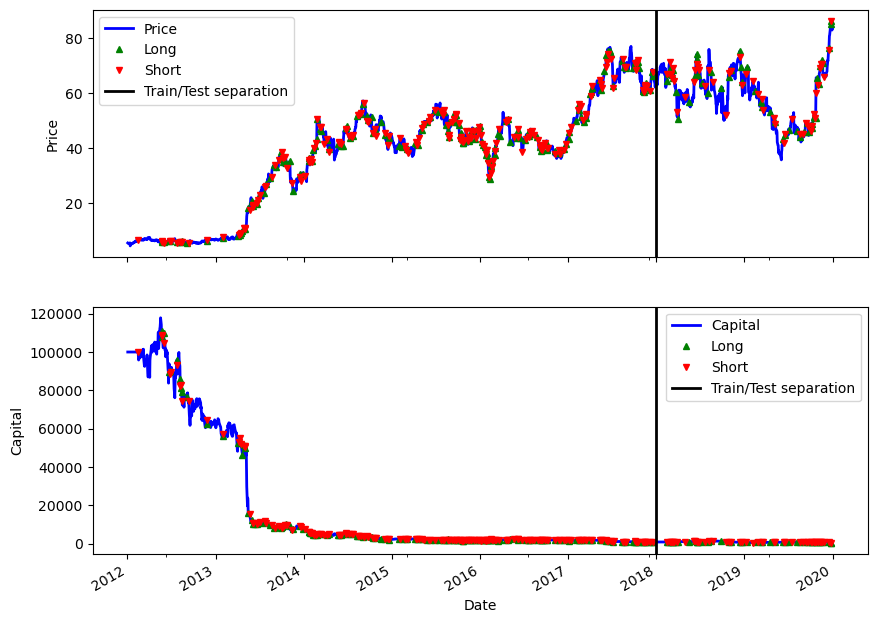

In [3]:
simulator = TradingSimulator()
strategy = "TDQN"
stock = "Tesla"

startingDate = '2012-1-1'
endingDate = '2020-1-1'
splitingDate = '2018-1-1'

simulator.simulateNewStrategy(strategy,
                              stock,
                              startingDate=startingDate,
                              endingDate=endingDate,
                              splitingDate=splitingDate,
                              saveStrategy=True,
                              data_dir=DATA_PATH)


In [4]:

simulator.displayTestbench(startingDate=startingDate,
                            endingDate=endingDate)

ERROR:root:Error in downloading data: 'NoneType' object has no attribute 'group'
INFO:root:Saving to CSV: ./data/DIA_2012-1-1_2020-1-1


AttributeError: 'TradingEnv' object has no attribute 'data'

INFO:root:


Analysis of the TRAINING phase time series
INFO:root:------------------------------------------



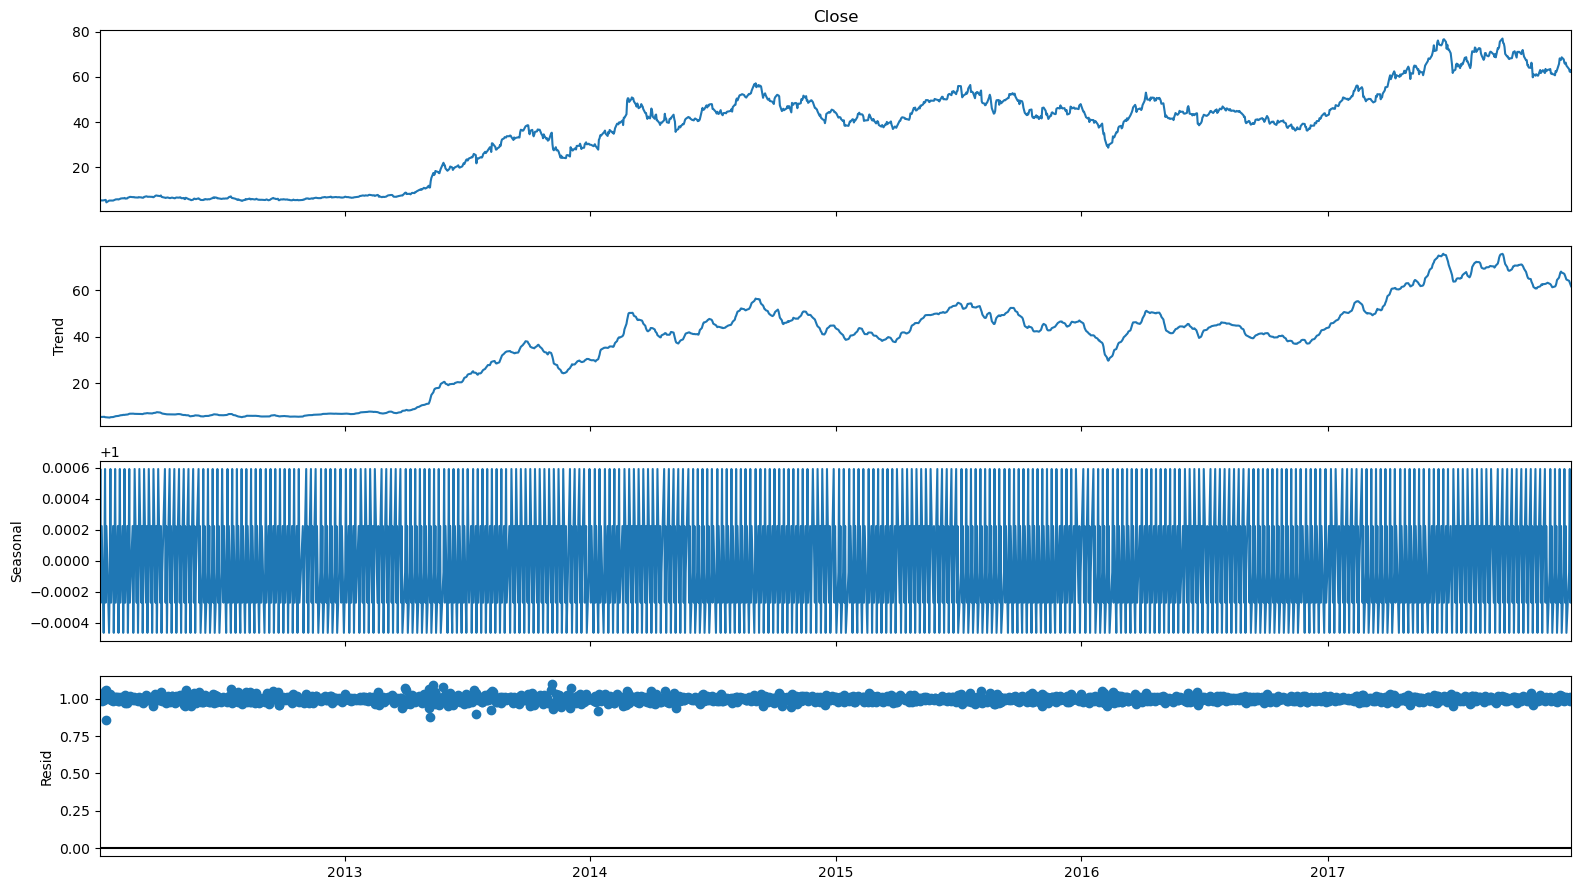

INFO:root:Stationarity analysis: Augmented Dickey-Fuller test (ADF):
INFO:root:ADF statistic: -1.3270928530081674
INFO:root:p-value: 0.6166879724474015
INFO:root:Critial values (the time series is not stationary with X% condifidence):
INFO:root:1%: -3.434696697851678
INFO:root:5%: -2.8634597924260303
INFO:root:10%: -2.567792072971565
INFO:root:The ADF test could not affirm whether or not the time series is stationary...


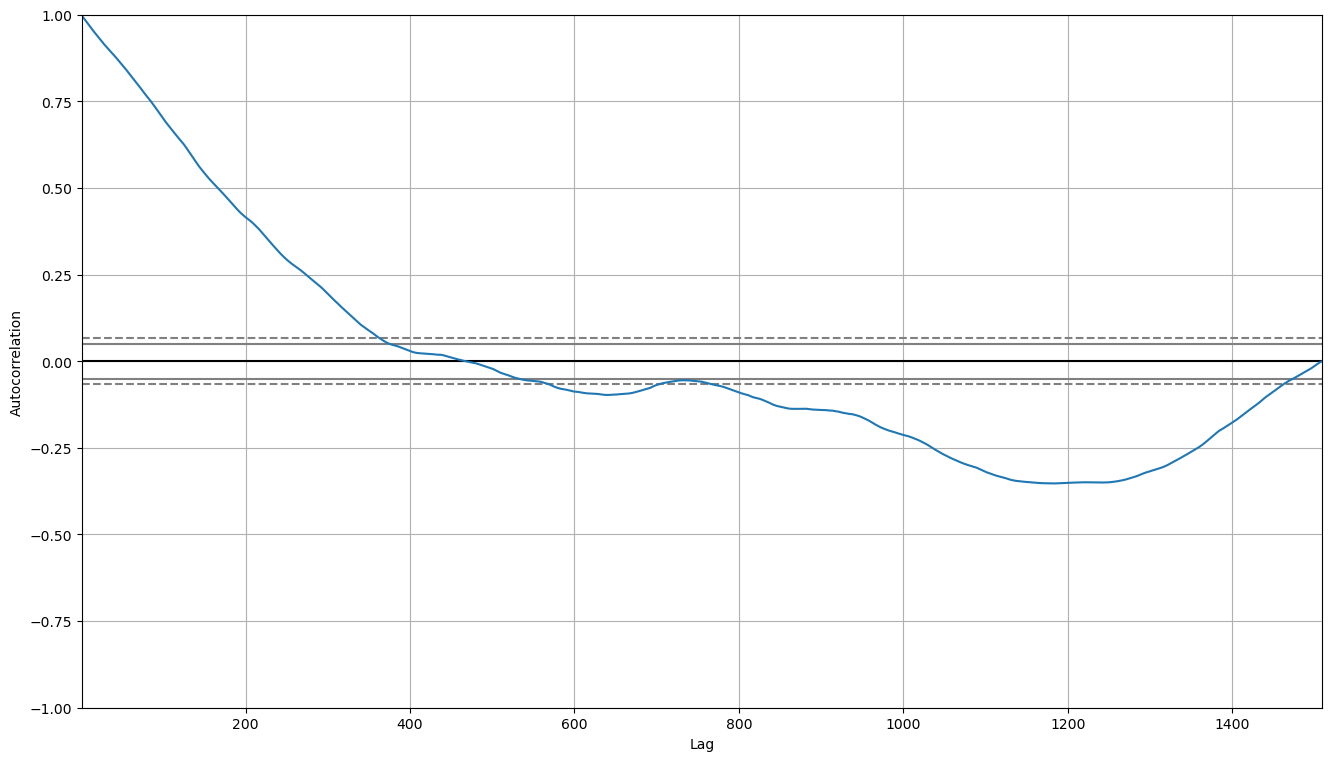

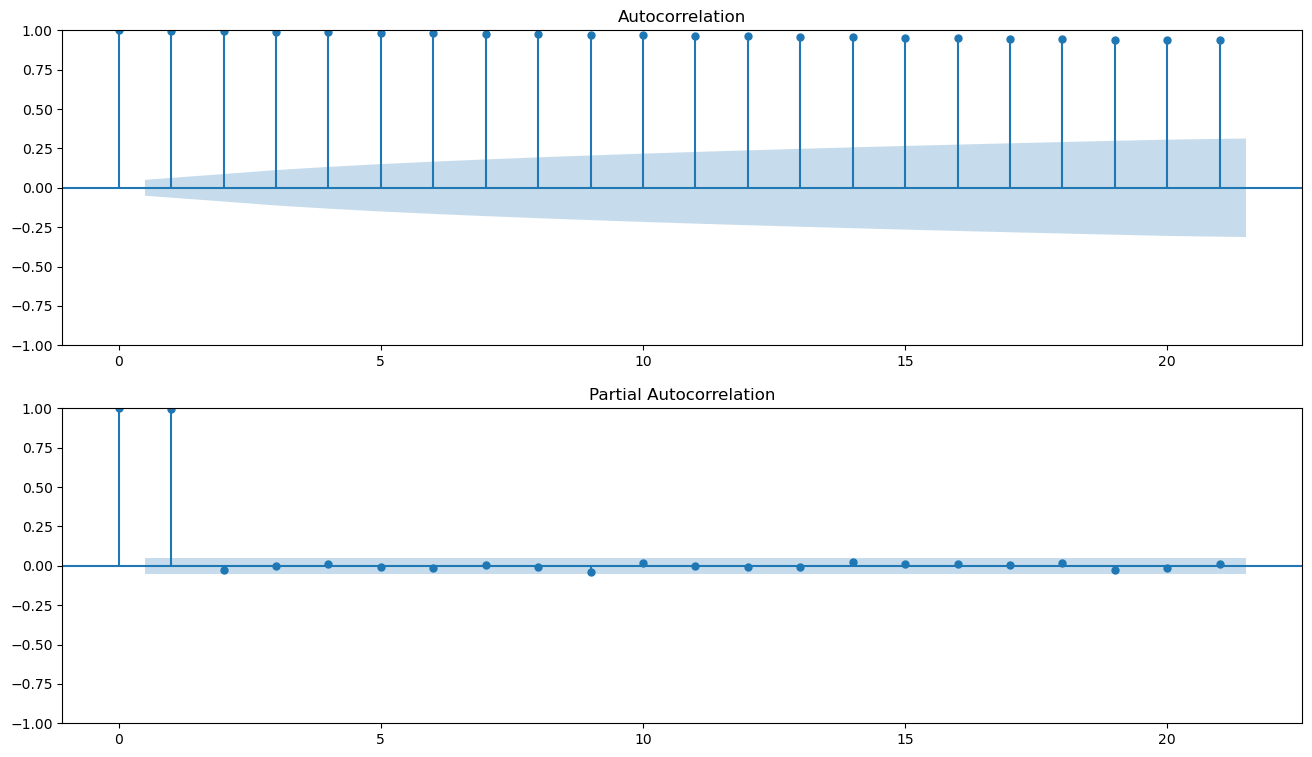

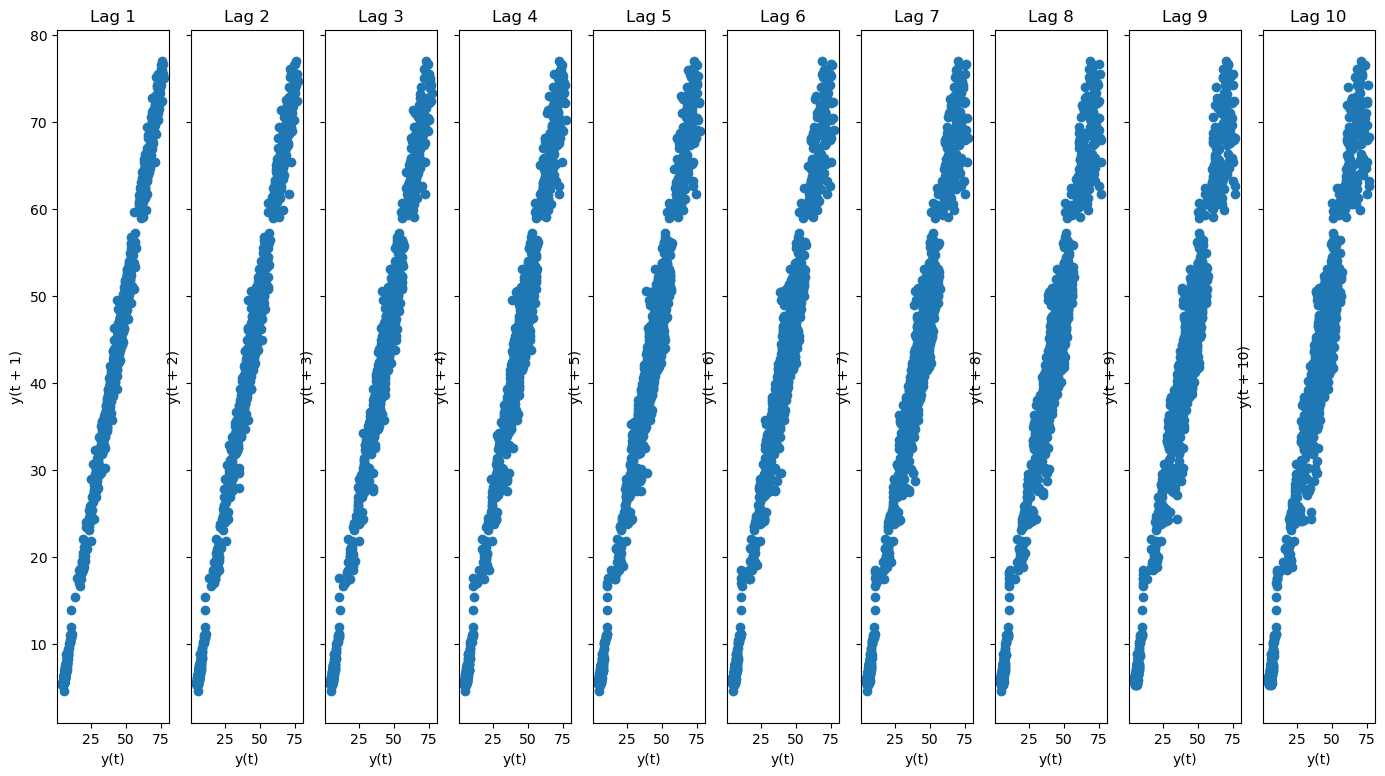

INFO:root:


Analysis of the TESTING phase time series
INFO:root:------------------------------------------



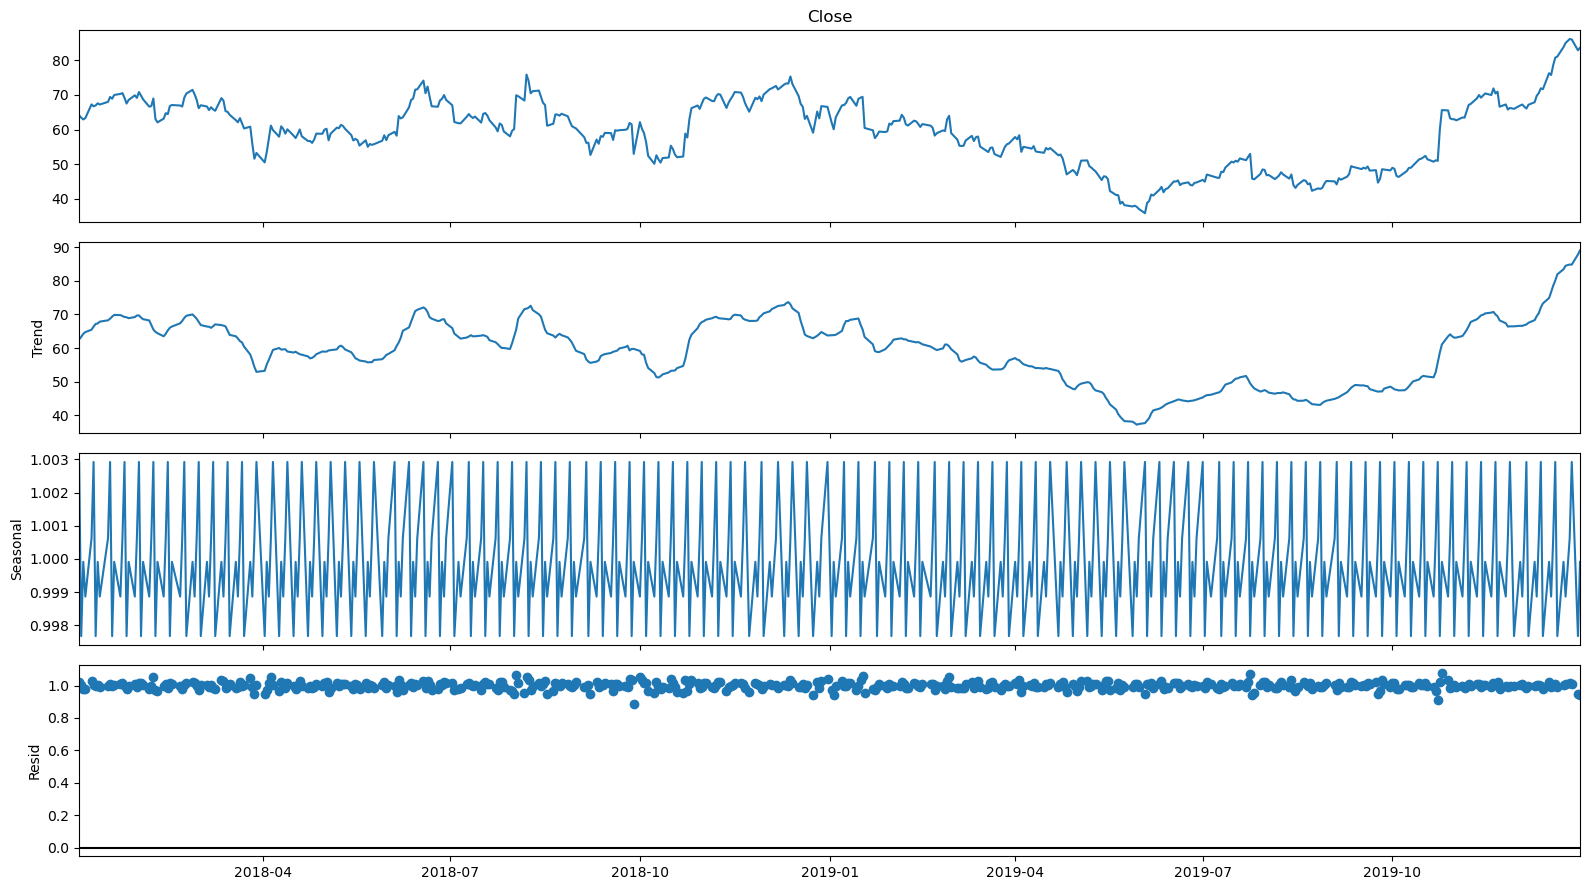

INFO:root:Stationarity analysis: Augmented Dickey-Fuller test (ADF):
INFO:root:ADF statistic: -1.6695243208020993
INFO:root:p-value: 0.44687888427657785
INFO:root:Critial values (the time series is not stationary with X% condifidence):
INFO:root:1%: -3.4434437319767452
INFO:root:5%: -2.8673146875484368
INFO:root:10%: -2.569845688481135
INFO:root:The ADF test could not affirm whether or not the time series is stationary...


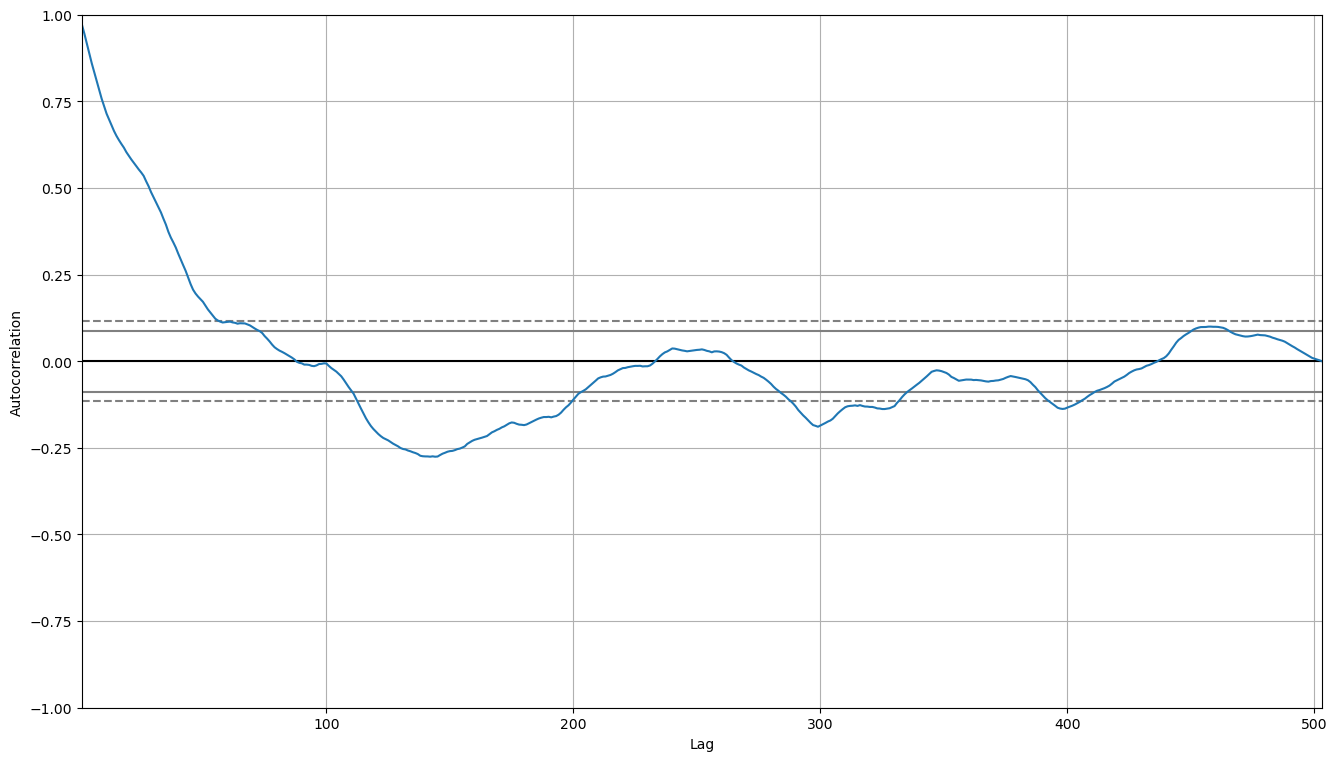

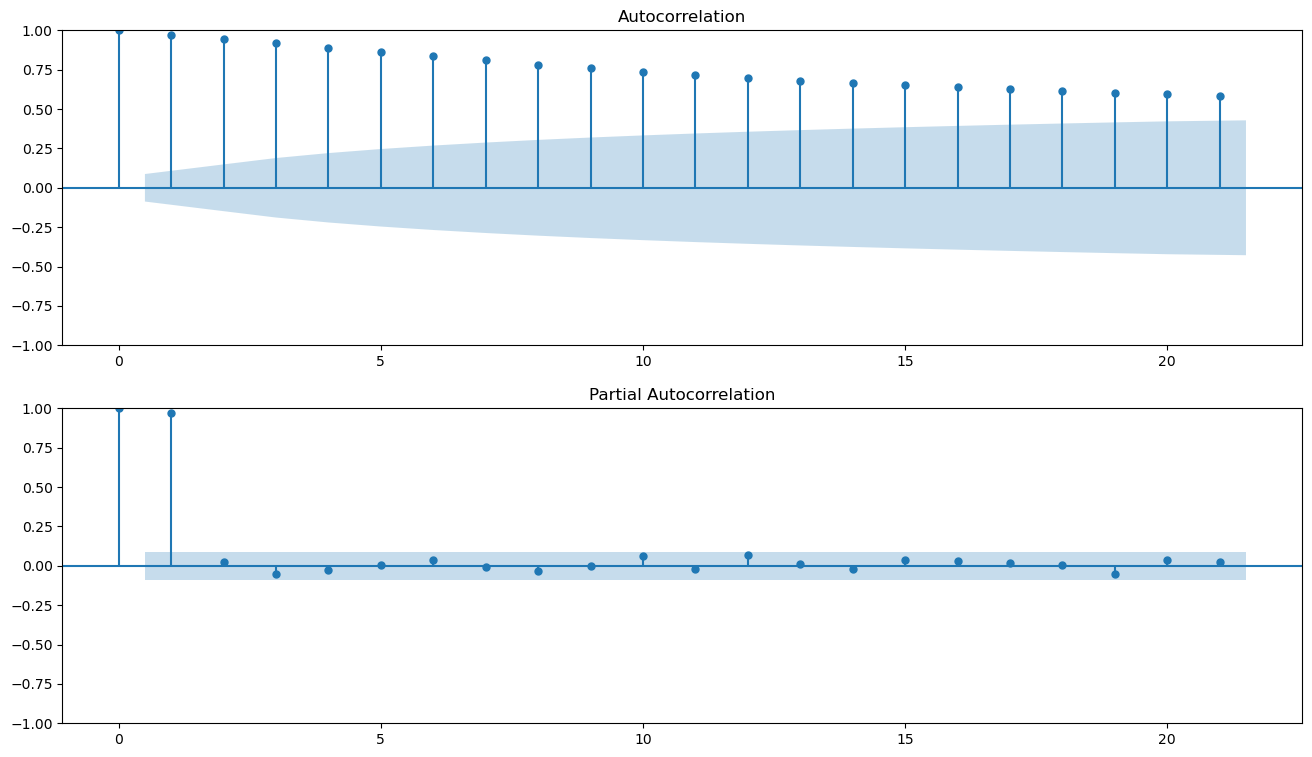

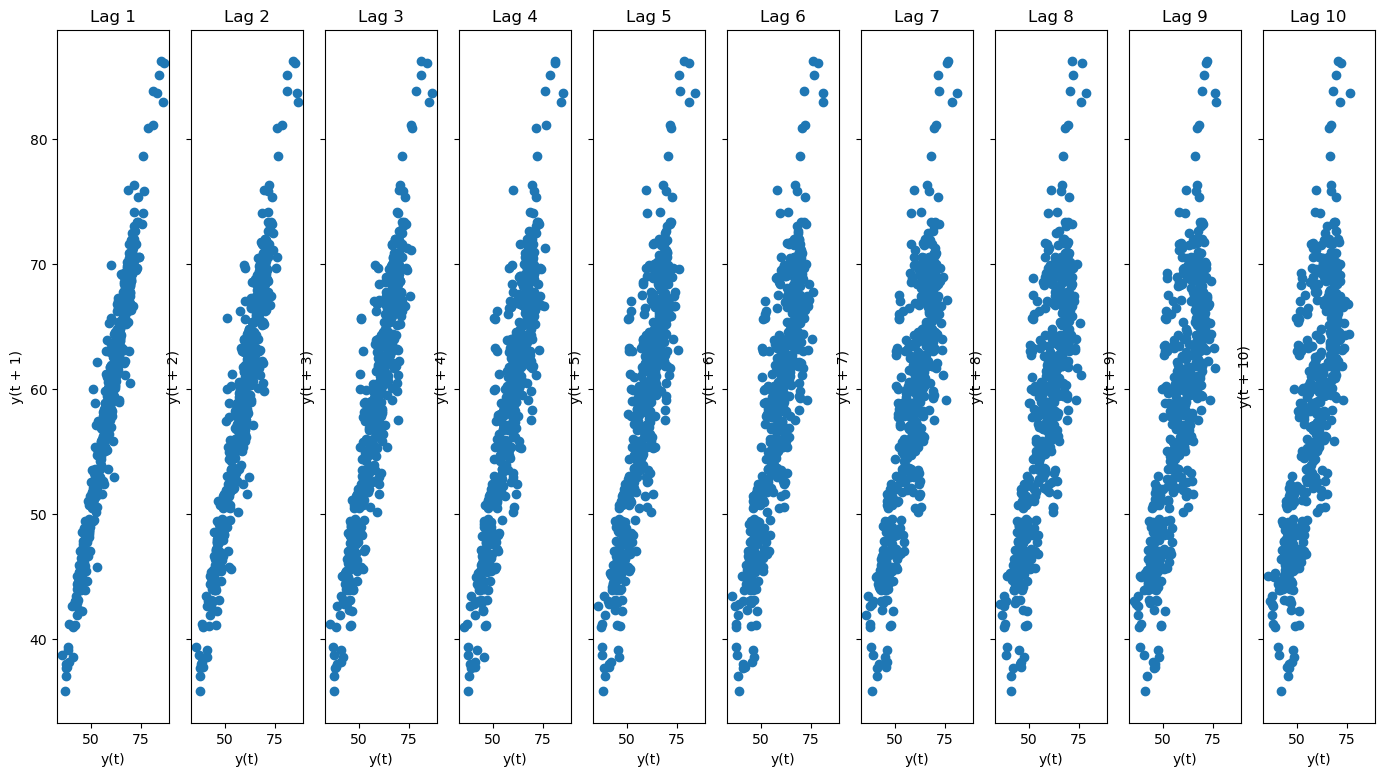

INFO:root:


Analysis of the entire time series (both training and testing phases)
INFO:root:---------------------------------------------------------------------

ERROR:root:Error in downloading data: 'NoneType' object has no attribute 'group'
INFO:root:Saving to CSV: ./data/TSLA_2012-1-1_2020-1-1


AttributeError: 'TradingEnv' object has no attribute 'data'

In [5]:
simulator.analyseTimeSeries(stock,
                            startingDate=startingDate,
                            endingDate=endingDate,
                            splitingDate=splitingDate)


In [6]:

simulator.evaluateStrategy(strategy,
                            saveStrategy=False,
                            data_dir=DATA_PATH,
                            startingDate=startingDate,
                            endingDate=endingDate,
                            splitingDate=splitingDate)

INFO:root:Trading strategy evaluation progression:
 30%|███       | 9/30 [03:14<07:34, 21.63s/it]

In [ ]:

simulator.evaluateStock(stock,
                        startingDate=startingDate,
                        endingDate=endingDate,
                        splitingDate=splitingDate)